In [36]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = "roberta-base"
batch_size = 16
num_epochs = 16

fileTag = "clean-noCombin-v1"

model_checkpoint

'roberta-base'

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [37]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [38]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//4], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//4:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//4], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//4:trainDatasetOriginal.shape[0]//2], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//2], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//2:trainDatasetOriginal.shape[0]//4*3], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//4*3:]])]), 
                                  'selection3': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//4*3], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//4*3:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//4 else (1 if x < trainDatasetOriginal.shape[0]//2 
                                                                                               else (2 if x < trainDatasetOriginal.shape[0]//4*3 
                                                                                               else 3)) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//4], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//4:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//4], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//4:testDatasetOriginal.shape[0]//2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//2], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//2:testDatasetOriginal.shape[0]//4*3], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//4*3:]])]), 
                                  'selection3': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//4*3], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//4*3:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//4 else (1 if x < testDatasetOriginal.shape[0]//2 
                                                                                               else (2 if x < testDatasetOriginal.shape[0]//4*3 
                                                                                               else 3)) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)


In [70]:
trainDatasetProcessed.to_csv(f'./dataset/4Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,label
0,['embarrassed'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Cindy is very tired.,"He uses earplugs and white noise to cope, but ...",She knew that she did it wrong because her sis...,He accused me of not working hard.,2
1,['enthusiastic'],"{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...",I picked some flowers from the garden by the s...,Brock loves cars.,Jim brought his empty bucket back into his hou...,Last Friday the daycare center celebrated Chin...,1
2,[],"{'joy': 2, 'trust': 2, 'fear': 2, 'surprise': ...",She put all the ingredients together and got t...,My friend told me my face was dirty.,She preferred to talk to boys and skip class.,She loved his witty plays.,3
3,['guilty'],"{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...","He held me on his lap, but I kept getting down.",She told me that no matter what she enjoyed he...,"He called Anne and apologized, adding he'd met...","Mark didn't listen, and went down the big hill.",2
4,['calm'],"{'joy': 2, 'trust': 0, 'fear': 2, 'surprise': ...",Jasper noticed that after a day of hard work h...,She was offered a babysitting job for $40 a week.,David decided to walk to a park.,I am having trouble assembling my costume.,2
...,...,...,...,...,...,...,...
42949,['determined'],"{'joy': 0, 'trust': 2, 'fear': 0, 'surprise': ...",Anna had an essay to write for class.,Our neighbor Tracy has a boy and a girl in ele...,May spent her life trying to prove that ghosts...,He laughs at her and and hangs up the phone.,2
42950,['justified'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",I decided to go to an orange farm.,Cleo ended up needing six cavities filled at t...,He planned his day carefully.,I packed it in a shoulder bag with a book.,1
42951,['distressed'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Tiffany scored her first ever goal and won the...,Tom and his daughter were very disappointed.,Tom was getting fast food.,Tracy sold her old car to her cousin.,1
42952,['determined'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",They listened to it together.,Behind the door was a teacher and students.,One day Annie decided to plant a garden.,"She expected her grandma to decline, but she a...",3


In [71]:
testDatasetProcessed.to_csv(f'./dataset/4Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,label
0,['afraid'],"{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",Kate turned around in a huff and finished her ...,Mike walked across a police officer parked on ...,Jeffrey has become one of my best friends!,The baby chickens seemed to be disappearing ov...,3
1,['appreciative'],"{'joy': 2, 'trust': 3, 'fear': 0, 'surprise': ...",The dentist realized Sandy's anxiety and offer...,They kept quiet from there on out.,She suddenly felt very ill.,"Rick argued with her, taking his time on the g...",1
2,['steadfast'],"{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",The next day I checked to see if anything grew.,People online will argue forever and no one ch...,Thankfully she found it after all in her neigh...,Andy liked swimming.,1
3,['scared'],"{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",Sherry was planning a gender reveal party for ...,She vacuum sealed her leftovers.,Tom bought it immediately.,Chloe got lost in the woods.,3
4,['excited'],"{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",He took his students to see a play in the city.,But she didn't have a large budget.,She challenged her little brother to a game.,They weathered the storm well.,2
...,...,...,...,...,...,...,...
43190,['upset'],"{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",No one understood why as he didn't like cabbage.,Their mom was not happy.,Lee wanted to give his girlfriend a gift.,Billy's father bought him the new pair of shoes.,1
43191,['sadistic'],"{'joy': 0, 'trust': 2, 'fear': 2, 'surprise': ...","When he arrived, she said she'd take the baby ...","Recently, Sandy had to go to the dentist for a...",Then he visited restaurants to taste Egyptian ...,He hired a local guide to instruct him.,0
43192,['excited'],"{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...","When it was time to take the test, Steve felt ...",His neighbor Bob came rushing to help him get ...,Brenda went on a vacation to Vegas.,They had to take shelter in a cave until it wa...,2
43193,['happy'],"{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...","However, Benjamin's friends copied his work.",There was a clown at Eddy's friend's birthday ...,Sharyn's sister Sue got married shortly after ...,Al came home and took the pipe off the drain.,1


# load dataset

In [41]:
from datasets import load_dataset, load_metric

In [42]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/4Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/4Select-{fileTag}-test.csv'})

Using custom data configuration default-58503371b4ef80cf


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-58503371b4ef80cf\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'label'],
        num_rows: 42954
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'label'],
        num_rows: 43195
    })
})

In [44]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['afraid']",
 'plutchik': "{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': 3, 'sadness': 0, 'disgust': 3, 'anger': 3, 'anticipation': 3}",
 'selection0': 'Kate turned around in a huff and finished her assignment.',
 'selection1': 'Mike walked across a police officer parked on the side of the road.',
 'selection2': 'Jeffrey has become one of my best friends!',
 'selection3': 'The baby chickens seemed to be disappearing overnight.',
 'label': 3}

In [62]:
def show_one(example):
    print(f"Context: {example['emotion']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"  D - {example['selection3']}")
    print(f"\nGround truth: option {['A', 'B', 'C', 'D'][example['label']]}")

In [69]:
show_one(dataset["train"][2])

Context: []
  A - She put all the ingredients together and got to work.
  B - My friend told me my face was dirty.
  C - She preferred to talk to boys and skip class.
  D - She loved his witty plays.

Ground truth: option D


# Preprocessing Data

In [49]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [50]:
selectionList = ["selection0", "selection1", "selection2", "selection3"]

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*4 for context in examples["emotion"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList] for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+4] for i in range(0, len(v), 4)] for k, v in tokenized_examples.items()}

In [51]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 4 [18, 28, 23, 19]


In [52]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(4) ]

['<s>The following sentences contain emotions: embarrassed</s></s>Cindy is very tired.</s>',
 "<s>The following sentences contain emotions: embarrassed</s></s>He uses earplugs and white noise to cope, but it isn't enough.</s>",
 '<s>The following sentences contain emotions: embarrassed</s></s>She knew that she did it wrong because her sister laughed.</s>',
 '<s>The following sentences contain emotions: enthusiastic</s></s>I picked some flowers from the garden by the store.</s>',
 '<s>The following sentences contain emotions: enthusiastic</s></s>Brock loves cars.</s>',
 '<s>The following sentences contain emotions: enthusiastic</s></s>Jim brought his empty bucket back into his house for next week.</s>',
 '<s>The following sentences contain emotions: </s></s>She put all the ingredients together and got to work.</s>',
 '<s>The following sentences contain emotions: </s></s>My friend told me my face was dirty.</s>',
 '<s>The following sentences contain emotions: </s></s>She preferred to tal

In [54]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/43 [00:00<?, ?ba/s]

  0%|          | 0/44 [00:00<?, ?ba/s]

# Fine-tuning the model

In [55]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultipleChoice: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

In [56]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    #learning_rate=5e-5, # for bert-base
    learning_rate=5e-7, # for roberta-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [57]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [58]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [60]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(4)]

['<s>The following sentences contain emotions: annoyed</s></s>They walked into every nearby building, but there were no bathrooms.</s><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: annoyed</s></s>He spent every minute of his free time working on the car.</s><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: annoyed</s></s>Everyone else was full from their meal, but Chris remained hungry.</s><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: annoyed</s></s>Last week he finally asked her out to dinner.</s><pad><pad><pad><pad><pad><pad><pad>']

In [61]:
show_one(dataset["train"][8])

Context: ['annoyed']
  A - They walked into every nearby building, but there were no bathrooms.
  B - He spent every minute of his free time working on the car.
  C - Everyone else was full from their meal, but Chris remained hungry.

Ground truth: option C


# Trainer Defined

In [78]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [79]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [80]:
!nvidia-smi

Fri Jun 17 05:08:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.23       Driver Version: 511.23       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:09:00.0  On |                  N/A |
| 30%   40C    P2    68W / 350W |  13376MiB / 24576MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 0.5 GB
Cached:    7.6 GB


In [82]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.678000,0.591944,0.716912
2,0.549700,0.479495,0.779905
3,0.482700,0.457887,0.789698
4,0.471500,0.438942,0.795995
5,0.460800,0.432413,0.799722
6,0.434800,0.434317,0.801181
7,0.444400,0.429941,0.804213
8,0.433400,0.425862,0.805510
9,0.417800,0.425906,0.806945
10,0.420700,0.425732,0.808265


TrainOutput(global_step=42960, training_loss=0.45674537289298, metrics={'train_runtime': 3240.1255, 'train_samples_per_second': 13.259, 'total_flos': 312197353314264.0, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

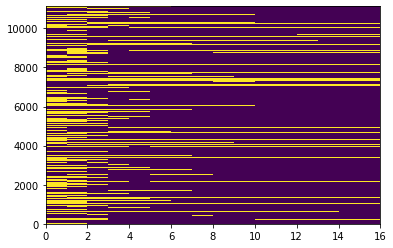

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [57]:
import pandas as pd

dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/emotion/2-1/trainingInfo-{model_checkpoint}-{fileTag}.csv')

In [58]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/emotion/2-1/evaluationSpecificInfo-{model_checkpoint}-{fileTag}.csv')